训练集大小: 741, 测试集大小: 318
测试集中高二元变量分布: (318, 30) (318, 1)
Counter({0: 253, 1: 65})
训练集中高二元变量分布: (741, 30) (741, 1)
Counter({0: 593, 1: 148})
开始训练LightGBM模型。。。
[LightGBM] [Info] Number of positive: 148, number of negative: 593
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 741, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199730 -> initscore=-1.387982
[LightGBM] [Info] Start training from score -1.387982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

C:\Users\29688\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\29688\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\29688\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


特征重要性:
[154   6 111 223 240  27  14  79  85  81  37  14  53  44 167  94 135  56
  51 174  95 165 108  74 215  91 117 104  28   0]
排列索引:
[28 26  4 18  8  6  9 12 21 20  0  5  7 29  2 22 23 25 13 17  3 15 10 14
  1 16 11 27 24 19]
SHAP值:
[[-0.31111789 -0.01118528 -0.01705139 ...  0.12411318  0.40131421
   0.        ]
 [ 0.34349343 -0.03832828  0.00770418 ...  0.1353462  -0.12911559
   0.        ]
 [-0.08131739 -0.01055999 -0.31088644 ...  0.12503888  0.472678
   0.        ]
 ...
 [ 0.10971109 -0.00931873 -0.56183023 ... -0.1837884  -0.158505
   0.        ]
 [ 0.0360649   0.12819255  0.12944036 ...  0.11242569 -0.00089472
   0.        ]
 [-0.77782717  0.06573774  0.06348761 ...  0.1884131   0.12258999
   0.        ]]
重要特征:
['LON' 'commute' 'sport' 'shifan' 'Tage' 'gender' 'subject' 'education'
 'title' 'height']
重要特征索引:
[19 24 27 11 16  1 14 10 15  3]
Accuracy: 0.7956, Precision: 0.5000, Recall: 0.1692, F1-score: 0.2529


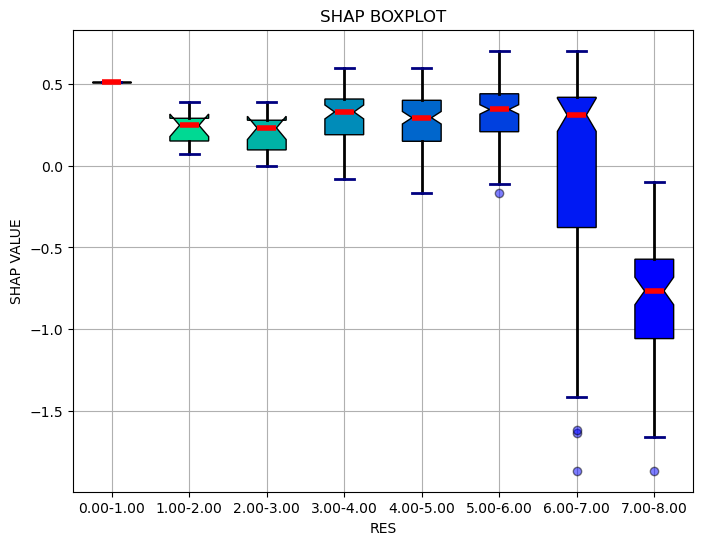

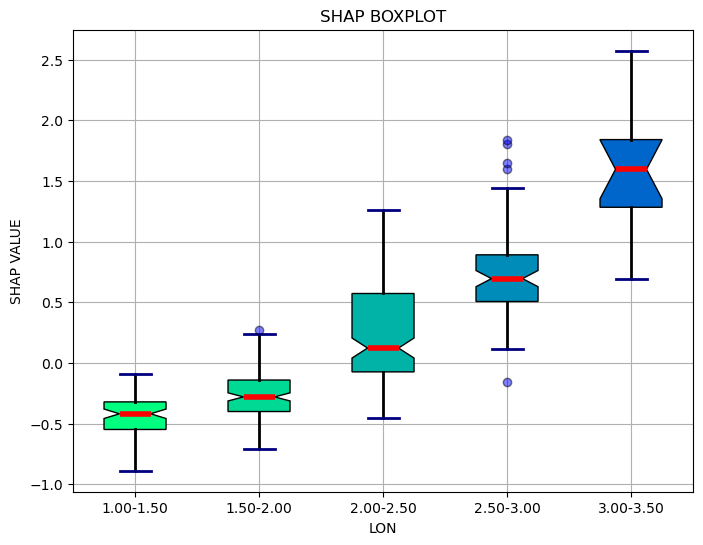

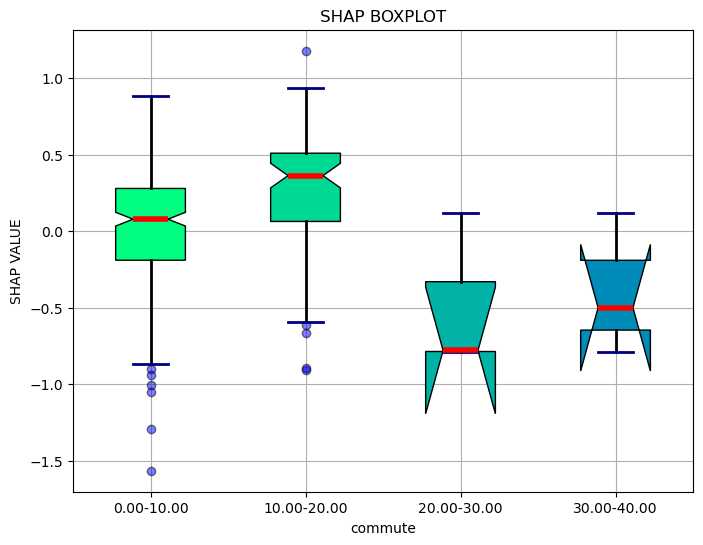

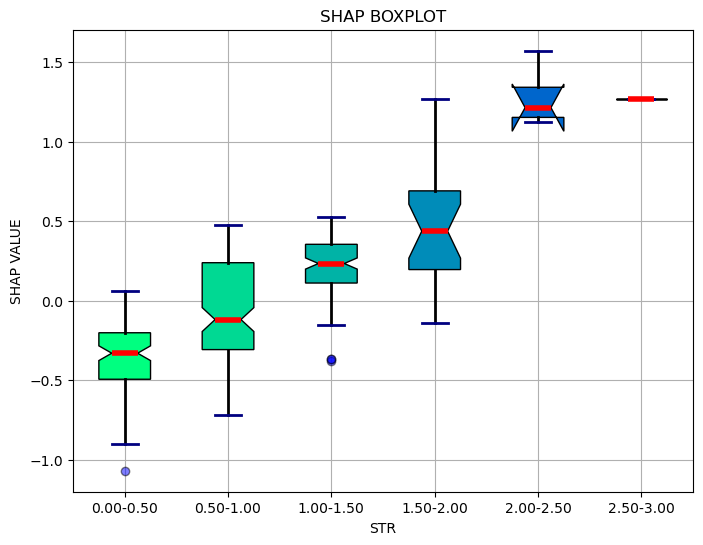

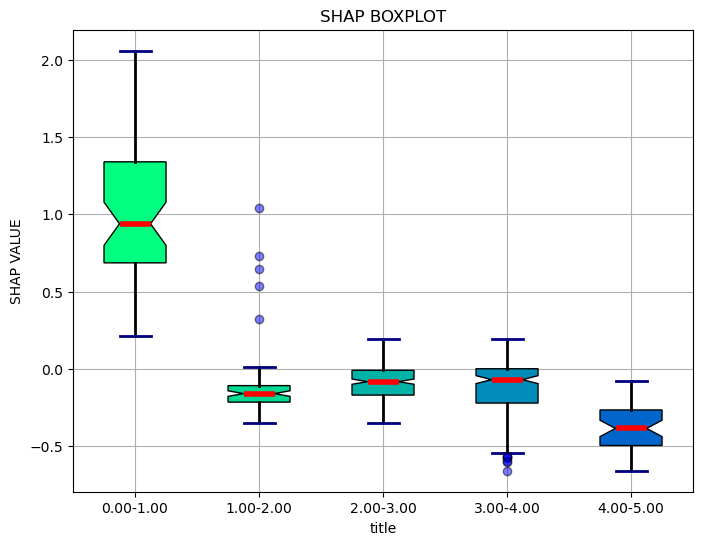

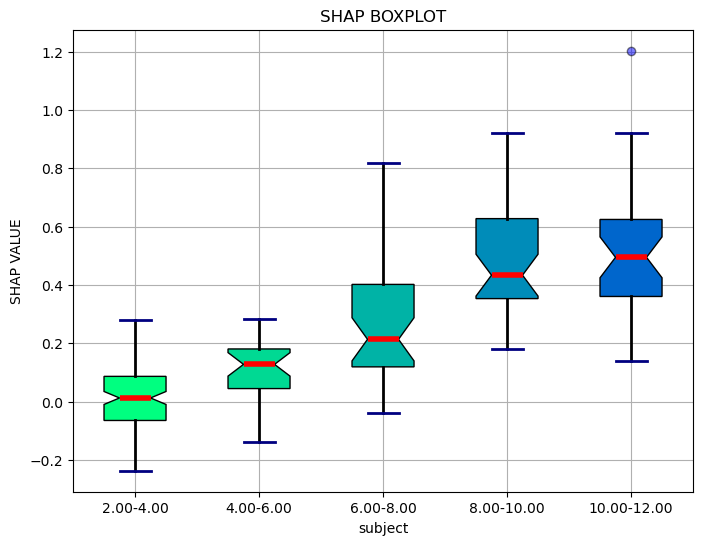

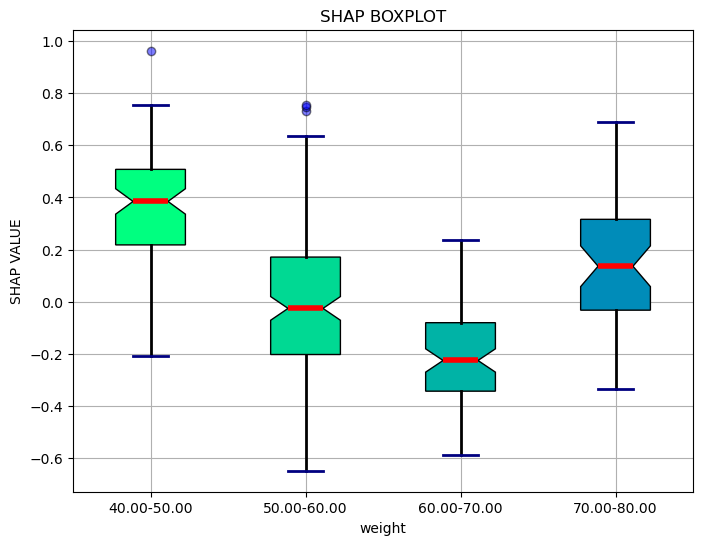

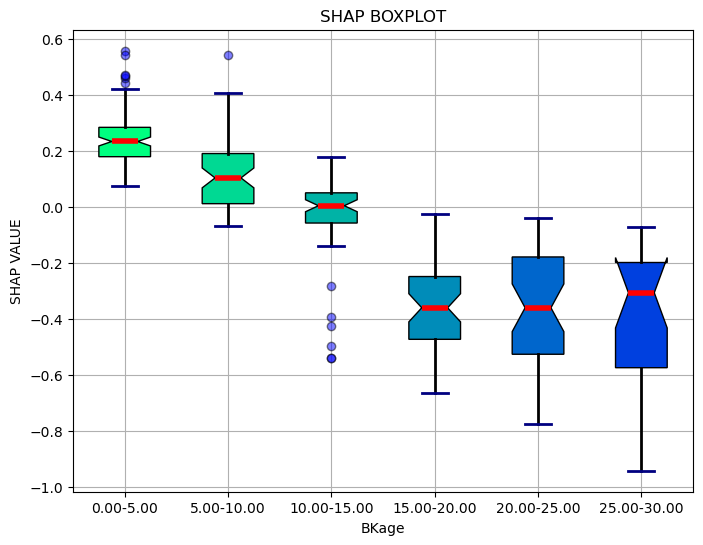

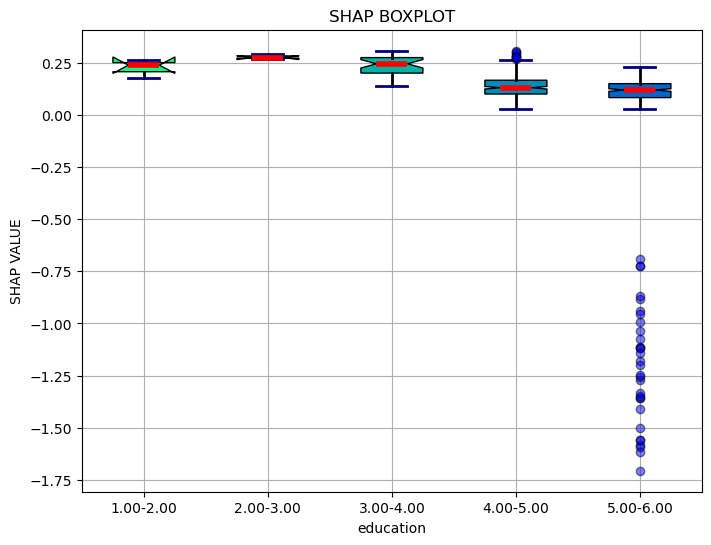

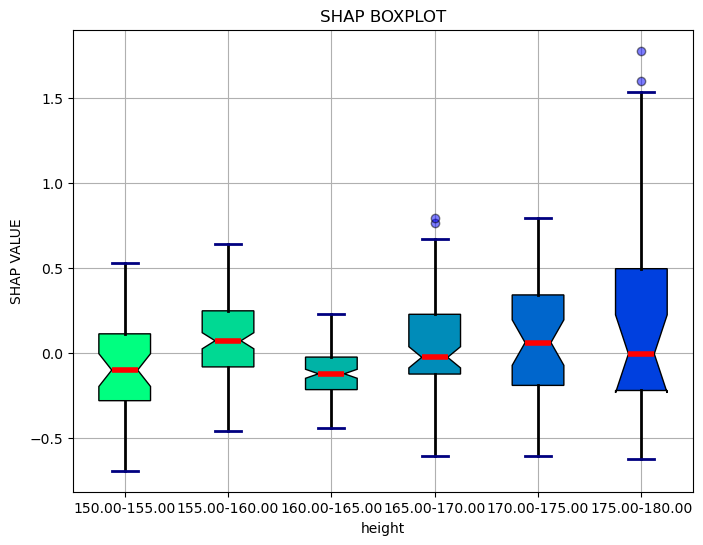

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import lightgbm as lgb
import matplotlib.cm as cm  # 用于设置颜色映射
from matplotlib.colors import LinearSegmentedColormap  # 添加这一行

# 计算性能指标
def calc_metrics(y_test, preds):
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1score = f1_score(y_test, preds)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1score:.4f}")
    return accuracy, precision, recall, f1score

# 模型训练与预测
def model_predict(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    return accuracy_score(y_predict_train, y_train), accuracy_score(y_predict_test, y_test), y_predict_test

# 获取特征重要性
def get_feature_importance(model, x_test, y_test, top_n):
    perm_importance = permutation_importance(model, x_test, y_test)
    perm_sorted_idx = perm_importance.importances_mean.argsort()
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(x_test)
    feature_importances = model.feature_importances_
    feature_names = np.array(list(x_test.columns))
    top_features = feature_names[perm_sorted_idx][-top_n:][::-1]
    top_indices = perm_sorted_idx[-top_n:][::-1]
    return feature_importances, perm_sorted_idx, shap_values, top_features, top_indices

# 机器学习函数
def machine_learning(df_src, df_tgt, top_n, split_ratio=0.3, random_seed=28):
    xstd = df_src.std()
    xmean = df_src.mean()
    x_normalized = (df_src - xmean) / xstd

    x_train, x_test, y_train, y_test = train_test_split(x_normalized, df_tgt, test_size=split_ratio,
                                                        random_state=random_seed, shuffle=True)

    xtestvalue = x_test * xstd + xmean

    print(f"训练集大小: {len(x_train)}, 测试集大小: {len(x_test)}")
    print('测试集中高二元变量分布:', x_test.shape, y_test.shape)
    print(Counter(y_test['low_binary']))
    print('训练集中高二元变量分布:', x_train.shape, y_train.shape)
    print(Counter(y_train['low_binary']))

    result_map = {}

    print("开始训练LightGBM模型。。。")
    gbm = lgb.LGBMClassifier(random_state=random_seed)
    score_train, score_test, y_predict_test = model_predict(gbm, x_train, y_train, x_test, y_test)

    dt_feature_importance, permsortedidx, shap_values, top_features, top_indices = get_feature_importance(gbm, x_test, y_test, top_n)
    print('特征重要性:')
    print(dt_feature_importance)
    print('排列索引:')
    print(permsortedidx)
    print('SHAP值:')
    print(shap_values)
    print('重要特征:')
    print(top_features)
    print('重要特征索引:')
    print(top_indices)

    result_map['LightGBM'] = (
    top_features, top_indices, xstd, xmean, xtestvalue, shap_values, x_test, y_test, gbm.predict_proba(x_test)[:, 1])

    calc_metrics(y_test, y_predict_test)

    return result_map

# 导入数据
df_path = r"C:\Users\29688\Desktop\T0_T1_处理后.xlsx"
save_folder = r"C:\Users\29688\Desktop\syudy-3\pictures\low"  # 替换为你的保存路径
top_n = 10

df = pd.read_excel(df_path)

# 自变量
df_src = df[['PRO', 'gender', 'age', 'height', 'weight','marriage', 'kid', 'Kage',
             'BKage', 'LKage', 'education','shifan', 'xueduan', 'BZR',
             'subject', 'title', 'Tage', 'DEP', 'ANX', 'LON', 'RES', 'STR', 'sleep',
             'rise', 'commute', 'work', 'mediation', 'sport', 'location_type', 'school_type']].astype(float)

# 因变量是 SWLS 列
df_tgt = df[['low_binary']]

# 运行机器学习并获取结果
result_map = machine_learning(df_src, df_tgt, top_n)

# 获取 SHAP 值
shap_values = result_map['LightGBM'][5]
x_test_value = result_map['LightGBM'][4]

# 需要绘制箱线图的特征和对应的边界
x_boundaries = {
    'RES': np.linspace(0,8,9),
    'LON': np.linspace(1,3.5,6),
    'commute': np.linspace(0,40,5),
    'STR': np.linspace(0,3,7),
    'title': np.linspace(0,5,6),
    'subject': np.linspace(2,12,6),
    'weight': np.linspace(40,80,5),
    'BKage': np.linspace(0,30,7),
    'education': np.linspace(1,6,6),
    'height': np.linspace(150,180,7)
}

# 绘制SHAP值的箱线图，应用第一种代码的颜色和样式
for feature_name in x_boundaries.keys():
    feature_idx = np.where(np.array(df_src.columns) == feature_name)[0][0]
    features_shap = shap_values[:, feature_idx]    # 获取当前特征的 SHAP 值

    features_x_data = x_test_value[feature_name]  # 获取当前特征的测试数据
    features_boundaries = x_boundaries[feature_name]  # 获取当前特征的边界值

    if len(np.unique(features_x_data)) == 2:
        # 如果特征的取值只有两种，单独处理
        shap_values_0 = [features_shap[k] for k, sample_value in enumerate(features_x_data) if sample_value == 0]
        shap_values_1 = [features_shap[k] for k, sample_value in enumerate(features_x_data) if sample_value == 1]

        # 创建箱线图
        plt.figure(figsize=(8, 6))
        bpt = plt.boxplot([shap_values_0, shap_values_1], labels=['0', '1'], patch_artist=True, notch=True)

        # 添加颜色
        colors = [cm.winter(0.85), cm.winter(0.65)]  # 颜色映射
        for patch, color in zip(bpt['boxes'], colors):
            patch.set_facecolor(color)

        # 设置胡须、箱体、异常值、中位数的样式
        for whisker in bpt['whiskers']:
            whisker.set(color='black', linewidth=2)
        for cap in bpt['caps']:
            cap.set(color='navy', linewidth=2)
        for median in bpt['medians']:
            median.set(color='red', linewidth=4)
        for flier in bpt['fliers']:
            flier.set(markerfacecolor='blue', marker='o', alpha=0.5)

        # X/Y轴标签和网格
        plt.xlabel(feature_name)
        plt.ylabel('SHAP VALUE')
        plt.grid(True)
        plt.title(f'SHAP BOXPLOT')
        file_path = os.path.join(save_folder, feature_name + '_boxplot.png')
        plt.savefig(file_path)

    else:
        # 否则按照区间划分进行处理
        box_data = []
        labels = []
        for j in range(len(features_boundaries) - 1):
            lower_bound = features_boundaries[j]
            upper_bound = features_boundaries[j + 1]
            subset_shap_values = [features_shap[k] for k, sample_value in enumerate(features_x_data)
                                  if lower_bound <= sample_value <= upper_bound]
            box_data.append(subset_shap_values)
            interval_label = f'{lower_bound:.2f}-{upper_bound:.2f}'
            labels.append(interval_label)

        # 创建箱线图
        plt.figure(figsize=(8, 6))
        bpt = plt.boxplot(box_data, labels=labels, patch_artist=True, notch=True)

        # 添加颜色
        num_colors = len(box_data)
        colors = [cm.winter(1 - i * 0.15) for i in range(num_colors)]  # 按数量动态生成颜色
        for patch, color in zip(bpt['boxes'], colors):
            patch.set_facecolor(color)

        # 设置胡须、箱体、异常值、中位数的样式
        for whisker in bpt['whiskers']:
            whisker.set(color='black', linewidth=2)
        for cap in bpt['caps']:
            cap.set(color='navy', linewidth=2)
        for median in bpt['medians']:
            median.set(color='red', linewidth=4)
        for flier in bpt['fliers']:
            flier.set(markerfacecolor='blue', marker='o', alpha=0.5)

        # X/Y轴标签和网格
        plt.xlabel(feature_name)
        plt.ylabel('SHAP VALUE')
        plt.grid(True)
        plt.title(f'SHAP BOXPLOT')
        file_path = os.path.join(save_folder, feature_name + '_boxplot.png')
        plt.savefig(file_path)

plt.show()
